<a href="https://colab.research.google.com/github/samarranjit/House_Prices_Prediction_XGBoost_Regression/blob/main/House_Price_Prediction_Using_XGBoost_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

We are building a Machine Learning Model that predicts the price of houses based on their features and their surrouding factors.

We are using XGBoost to perform this task.

---

The dataset that we are using is publicly available at https://lib.stat.cmu.edu/datasets/boston
We are using this data for educational purposes only

###Importing the dependencies


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics #
from xgboost import XGBRegressor

Importing the Boston House Price Dataset


In [41]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [42]:
#Trying tp see what the raw data looks like
print(raw_df.info())

#We could see that there are 1012 entries but we learnt from the data source that there are only 506 data rows, so we need to investigate what is the problem with the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB
None


In [43]:
#Let's look at the top rows of the data and see what the data actually looks like in terms of numbers
raw_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
5,392.83000,4.03,34.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.03237,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
7,394.63000,2.94,33.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.06905,0.00,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
9,396.90000,5.33,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fixing the problem of row inconsistency:

In [18]:
#The Problem was that the single entry occupies two rows, i.e. two rows make one entry so we need to solve this problem first
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print("Data" , data)
print("Target", target)

Data [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Target [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 2

In [19]:
#Let's look if we have fixed the problem we had
print("Data shape:", data.shape)
print("Target shape:", target.shape)


Data shape: (506, 13)
Target shape: (506,)


In [21]:
print("First data row:", data[0])
print("Length of first data row:", len(data[0]))

print("First target:", target[0])
print("Length of Target: ", len(target))

First data row: [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
Length of first data row: 13
First target: 24.0
Length of Target:  506


In [36]:
# Names for the columns

feature_names = [
    "CRIM",  # per capita crime rate by town
 "ZN",       # proportion of residential land zoned for lots over 25,000 sq.ft.
 "INDUS",    # proportion of non-retail business acres per town
 "CHAS",     # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 "NOX",      # nitric oxides concentration (parts per 10 million)
 "RM",       # average number of rooms per dwelling
 "AGE",      # proportion of owner-occupied units built prior to 1940
 "DIS",      # weighted distances to five Boston employment centres
 "RAD",      # index of accessibility to radial highways
 "TAX",      # full-value property-tax rate per $10,000
 "PTRATIO",  # pupil-teacher ratio by town
 "B",        # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 "LSTAT",    # % lower status of the population
#  "Price",     # Median value of owner-occupied homes in $1000's
]
print(len(feature_names))

13


In [39]:

# Creating a single DataFrame from the data that we have
house_price_df = pd.DataFrame(data, columns=feature_names)

# Add the target column
house_price_df["Price"] = target

# See the result
print(house_price_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## Checking the quality of the data i.e. Checking the Null Values in the table


In [71]:
house_price_df.isnull().sum()

#shows that the data is good quality with no any null values

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## Viewing the correlation metrices of the features to look at the dependencies

---

**Correlation matrices help quickly:**

  - See which features are related to the target

  - Detect multicollinearity (i.e., features that are too similar to each other)

**Why do we need to see the collinearity :**
- If two features are highly correlated with each other, one might be redundant.

- Also, if a feature is highly correlated with the target, it might be more useful for prediction.
---

**Notes**:

- The actual ML algorithms (like Random Forest, XGBoost, etc.) don’t require feature selection via correlation — they can handle redundant features.

- But for linear models or manual feature engineering, correlation is highly relevant.

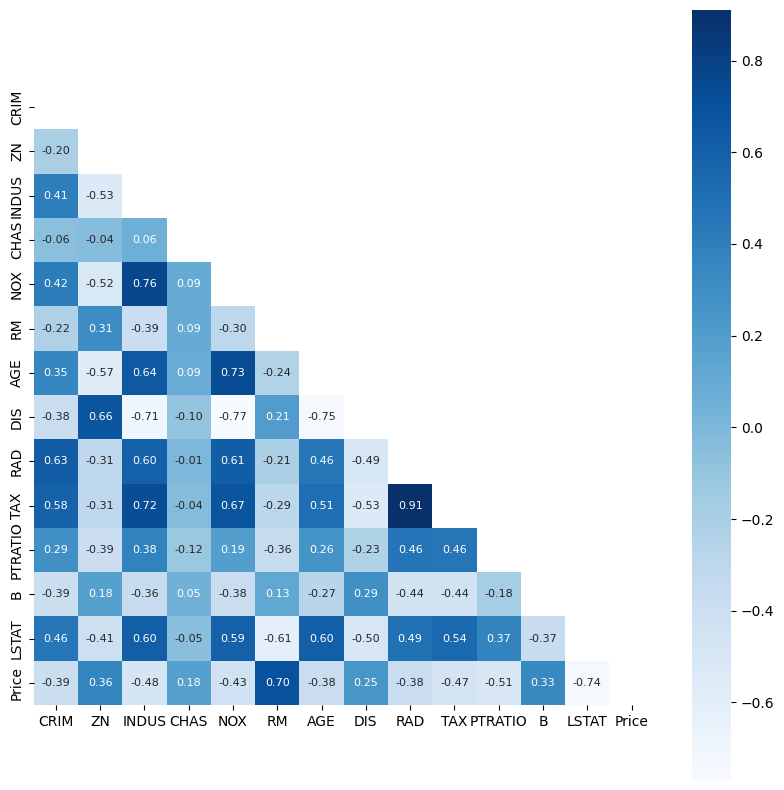

In [54]:
# Create a mask for the upper triangle
mask = np.triu(house_price_df.corr())

plt.figure(figsize=(10, 10))
sns.heatmap(house_price_df.corr(), cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 8}, cmap='Blues', mask=mask)
plt.show()

## Splitting Data

### Splitting into data and Target


In [55]:
X = house_price_df.drop(['Price'], axis=1)
Y = house_price_df['Price']

print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

### Splitting into training and Testing Data

In [61]:
# We are taking 20% as test data and the remaining 805 of the data as training data

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("X_Train :", X_Train.shape)
print("X_Test", X_Test.shape)
print("Y_Train:",Y_Train.shape)
print("Y_Test: ", Y_Test.shape)

X_Train : (404, 13)
X_Test (102, 13)
Y_Train: (404,)
Y_Test:  (102,)


## Training the Model

### XGBoost Regressor:

As mentioned earlier, we will be uisng XGBoost for this purpose. Here, we will be training our model with our training dataset.

In [63]:

#Lets use the model to train on the data
model = XGBRegressor() # coming from the xgboost library that we imported at the top of the page

model.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#let's check how it performs on the training data itself
#Remember, it has already seen this data so the metrices should show high number

training_data_prediction = model.predict(X_Train)
print(training_data_prediction)

### Let's check the metrices on how well the model is fitted to the data

In [66]:
training_r_sq = metrics.r2_score(Y_Train, training_data_prediction)
print("R Squared Error: ", training_r_sq)

training_mae = metrics.mean_absolute_error(Y_Train, training_data_prediction)
print("Mean Absolute Error: ", training_mae)

R Squared Error:  0.9999980039471451
Mean Absolute Error:  0.0091330346494618


## Testing on the Test Dataset


In [67]:
test_data_prediction = model.predict(X_Test)
print(test_data_prediction)

[22.007828  21.22598   30.466019  27.735027   9.134951  12.740403
 25.738058  27.750889  25.364376  20.229292  27.821787  24.7761
 19.771252  20.497349  12.970438  22.86288   19.605635  10.677987
  8.277654  15.529657  22.842052  20.002996  34.06762   18.943192
 15.624948  18.787666  46.0246    33.05114   34.804283  19.070232
 17.53711   20.27066   31.102339  24.026129  12.199101  18.224184
 10.182956  21.252314  22.891352  21.458113  26.451164  12.1898775
 27.141438   8.322471  21.356699  12.768549  35.221687  14.574406
 32.06173   15.088605  31.076805  26.808199   6.1558666 34.42615
 25.135347  19.508772  19.424906  19.58183   16.680052  22.962534
 20.904106  21.24      18.46788   29.243906  33.434864  26.021257
 49.91979   25.905489   9.713634  24.058743  16.63922    9.0341625
 13.197622  18.80479   26.985659  24.746912  22.200838  21.017391
 19.30188   24.098715  34.517494  19.51518   20.331131  31.346212
 47.815742  36.102997  17.42751   24.595816  29.387545  18.68302
 19.893139  

### Let's check the metrices of the predicted values for the test data

In [69]:
test_r_sq = metrics.r2_score(Y_Test, test_data_prediction)
print("R Squared Error: ", test_r_sq)

test_mae = metrics.mean_absolute_error(Y_Test, test_data_prediction)
print("Mean Absolute Error: ", test_mae)

R Squared Error:  0.9051721149855378
Mean Absolute Error:  2.0748727686264927


## Visualizing the Actual Prices and the Predicted Prices

Let's make a correlation plot between the actual prices and the predicted prices inorder to see how well we have performed.

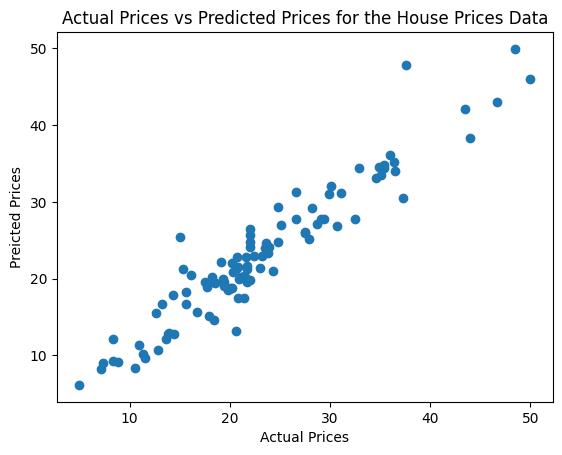

In [72]:
plt.scatter(Y_Test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Preicted Prices")
plt.title("Actual Prices vs Predicted Prices for the House Prices Data")
plt.show(plt.ion)
